<a href="https://colab.research.google.com/github/CloverWS/LSTM-Spam-Email-Recognition/blob/master/Spam-Email-Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np

data=pd.read_csv('email.csv')
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,email,label
4836,Subject: using claal 1 s ; somma vlcodd 1 n vl...,0
3402,Subject: fw : june 2001 blue dolphindarren you...,1
2885,Subject: fw : calpine monthly average revisedd...,1
1045,Subject: re : vacationi will leave the choice ...,1
3684,Subject: enjoy itgeneric viagra at cheap price...,0


In [19]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['email'].values)
sequences = tokenizer.texts_to_sequences(data['email'].values)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sequences,data['label'].values, test_size = 0.20, random_state = 42)

In [20]:

maxlen = 20
from keras import preprocessing
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
x_train

array([[331,  44, 796, ..., 623,   7,  44],
       [726,  38, 568, ..., 156, 226,  31],
       [ 46,  17, 672, ..., 126,  46,  17],
       ...,
       [317, 441,  55, ...,  52, 102, 154],
       [ 62, 189,  56, ..., 834,   7,  31],
       [160,  94,   4, ...,   3,  17,  31]], dtype=int32)

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding,LSTM
model = Sequential()
model.add(Embedding(2000, 8, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             16000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               43600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 59,701
Trainable params: 59,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
104/104 [==============================] - 4s 41ms/step - loss: 0.4740 - accuracy: 0.7809 - val_loss: 0.2983 - val_accuracy: 0.9118
Epoch 2/5
104/104 [==============================] - 4s 37ms/step - loss: 0.2095 - accuracy: 0.9217 - val_loss: 0.1588 - val_accuracy: 0.9324
Epoch 3/5
104/104 [==============================] - 4s 38ms/step - loss: 0.1538 - accuracy: 0.9

In [15]:
result=model.evaluate(x_test,y_test)
print("test loss:{}\ntest accuracy:{}".format(result[0],result[1]))

33/33 [==============================] - 0s 5ms/step - loss: 0.1626 - accuracy: 0.9333
test loss:0.16258470714092255
test accuracy:0.9333333373069763


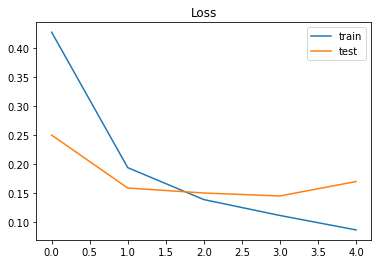

In [10]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

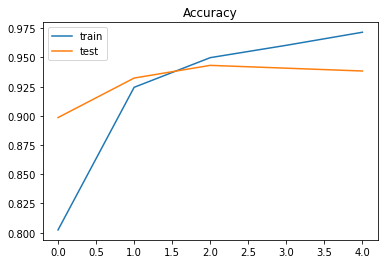

In [11]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()